In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline

import plotly.express as px
from scipy.stats import entropy

from yt_utils import YouTubeAccessor
from yt_utils import YouTubeCategories

In [3]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [4]:
trending_url = "https://squeemos.pythonanywhere.com/static/yt_trending.feather"
categories_url = "https://squeemos.pythonanywhere.com/static/yt_categories.feather"
cats_url = "https://squeemos.pythonanywhere.com/static/video_categories.json"

In [5]:
df = pd.read_feather(trending_url)

In [6]:
categories = YouTubeCategories(cats_url, local = False)

In [7]:
ids = df.yt["id"].unique()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


27368.5 87102.0 66 51840.69696969697


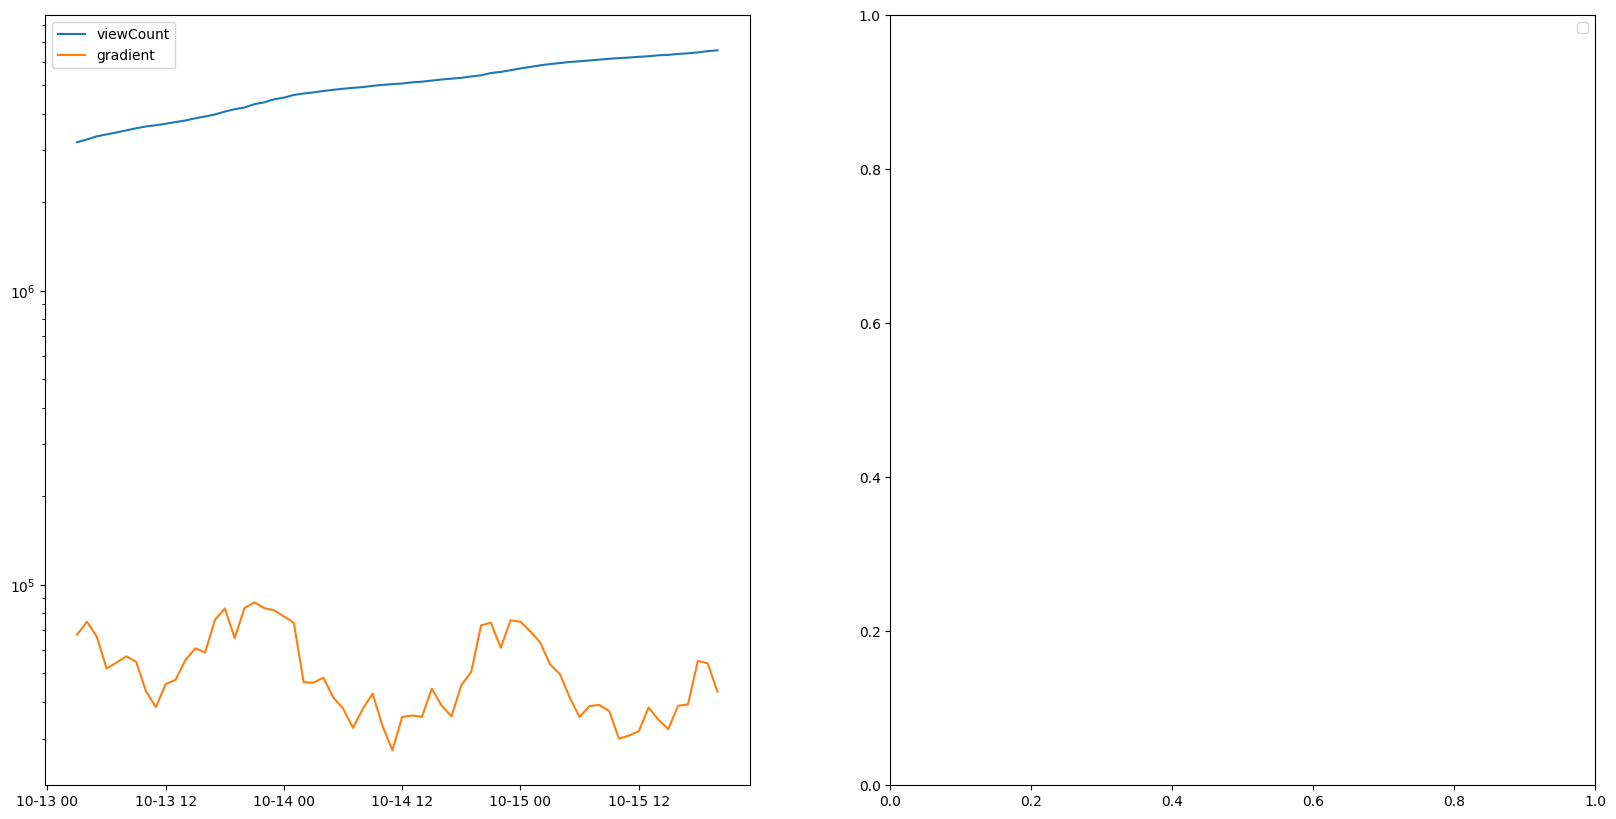

In [8]:
info = {}
for vid_id in ids:
    sub = df[df.yt["id"] == vid_id]
    sub = sub.sort_values(by = sub.yt.get_alias("queryTime"))
    values = sub.yt["viewCount"].values
    
    grad = np.gradient(values)
    
    print(grad.min(), grad.max(), len(grad), grad.mean())
    fig, ax = plt.subplots(1, 2, figsize = (20, 10))

    ax[0].plot(sub.yt["queryTime"], sub.yt["viewCount"], label = "viewCount")
    ax[0].plot(sub.yt["queryTime"], grad, label = "gradient")
    ax[0].legend()
    ax[0].set_yscale("log")
    
    ax[1].legend()
    
    plt.show()
    break

In [10]:
values.shape

(66,)

In [11]:
grad.shape

(66,)

In [66]:
turn_to_df = []
for vid_id in ids:
    sub = df[df.yt["id"] == vid_id]
    title = sub.yt["title"].values[0]
    values = sub.yt["viewCount"].values
    mean = values.mean()
    ent = entropy(values)
    turn_to_df.append([vid_id, title, mean, ent])

plot_df = pd.DataFrame(turn_to_df, columns = ["id", "title", "mean", "entropy"])

px.scatter(
    plot_df,
    x = "mean",
    y = "entropy",
    color = "title",
)

In [63]:
turn_to_df = []
for vid_id in ids:
    sub = df[df.yt["id"] == vid_id]
    title = sub.yt["title"].values[0]
    values = sub.yt["viewCount"].values
    mean = values.mean()
    try:
        grad = np.gradient(values)
        turn_to_df.append([vid_id, title, mean, grad.mean()])
    except ValueError:
        pass
    
plot_df = pd.DataFrame(turn_to_df, columns = ["id", "title", "mean", "grad_mean"])

px.scatter(
    plot_df,
    x = "mean",
    y = "grad_mean",
    color = "title",
)

In [136]:
turn_to_df = []
for vid_id in ids:
    sub = df[df.yt["id"] == vid_id]
    sub = sub.sort_values(by = df.yt.get_alias("queryTime"))
    title = sub.yt["title"].values[0]
    values = sub.yt["viewCount"].values
    mean = values.mean()
    try:
        grad = np.gradient(values)
        turn_to_df.append([vid_id, title, mean, grad.mean(), values.max(), values.min(), grad.max(), grad.min()])
    except ValueError:
        pass

plot_df = pd.DataFrame(turn_to_df, columns = ["id", "title", "mean", "grad_mean", "values_max", "values_min", "grad_max", "grad_min"])

plot_df["growth_factor_gmm"] = plot_df["grad_mean"] / plot_df["mean"]
plot_df["growth_factor_gmom"] = plot_df["grad_max"] / plot_df["grad_min"]

px.scatter(
    plot_df,
    x = "mean",
    y = "grad_mean",
    color = "title",
)

In [135]:
px.scatter(
    plot_df,
    x = "grad_max",
    y = "grad_min",
    color = "title"
)

In [137]:
px.bar(
    plot_df,
    x = "title",
    y = "growth_factor_gmom",
    color = "growth_factor_gmom",
)